# Data Analysis with Python - Emergency 911 Calls

911 Calls dataset can be found in "https://www.kaggle.com/mchirico/montcoalert"



-- Import libraries --


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

-- Load dataset --

In [3]:
df = pd.read_csv("D:\Downloads\911.csv")

-- Check info and head --

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


-- Top five zip codes for 911 calls --

In [6]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

-- Top five township for 911 calls --

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

-- How many unique code titles ? --

In [8]:
df['title'].nunique()

148

-- Create a new "reason" column from title --

In [9]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

-- Most common reasons based on the new column --

In [10]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

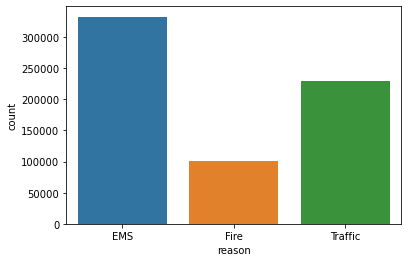

In [11]:
sns.countplot(x = 'reason', data = df)

-- Convert 'timeStamp' from string to datetime, then separate --

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
time = df['timeStamp'].iloc[0]


In [44]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['year'] = df['timeStamp'].apply(lambda time: time.year)

In [25]:
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [30]:
df['day'] = df['day'].map(day_map)

-- Countplot day with hue as reason --

<AxesSubplot:xlabel='day', ylabel='count'>

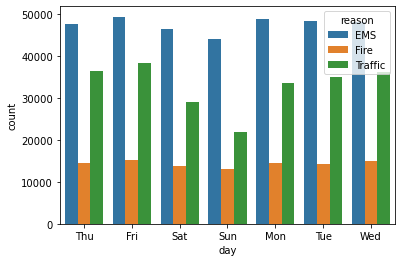

In [31]:
sns.countplot(x = 'day', data = df, hue = 'reason')

-- Countplot month with hue as reason --

<AxesSubplot:xlabel='month', ylabel='count'>

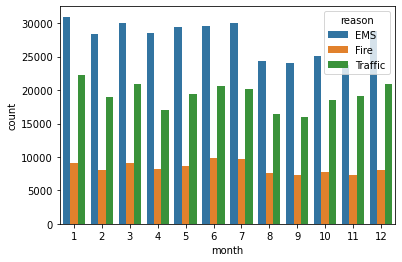

In [32]:
sns.countplot(x = 'month', data = df, hue = 'reason')

-- Countplot year with hue as reason --

<AxesSubplot:xlabel='year', ylabel='count'>

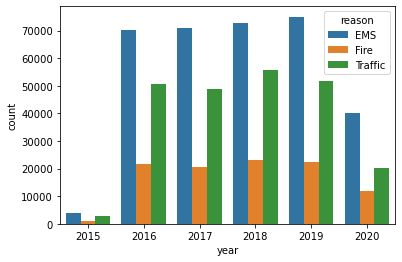

In [55]:
sns.countplot(x = 'year', data = df, hue = 'reason')

-- Restructure by grouping days and hours --

In [36]:
hour_day = df.groupby(by = ['day', 'hour']).count()['reason'].unstack()
hour_day.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


-- Heatmap and clustermap representations --

<AxesSubplot:xlabel='hour', ylabel='day'>

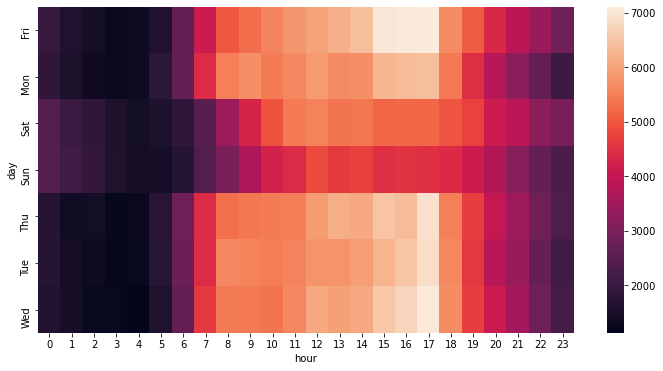

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(hour_day)

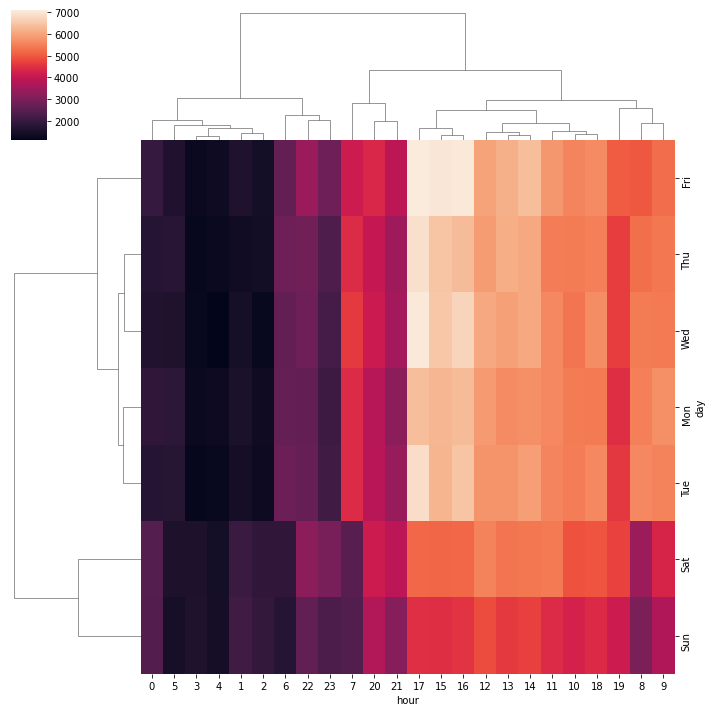

In [38]:
sns.clustermap(hour_day)

-- Grouping with day and month --

In [39]:
month_day = df.groupby(by = ['day', 'month']).count()['reason'].unstack()
month_day.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


-- heatmap and clustermap representation --

<AxesSubplot:xlabel='month', ylabel='day'>

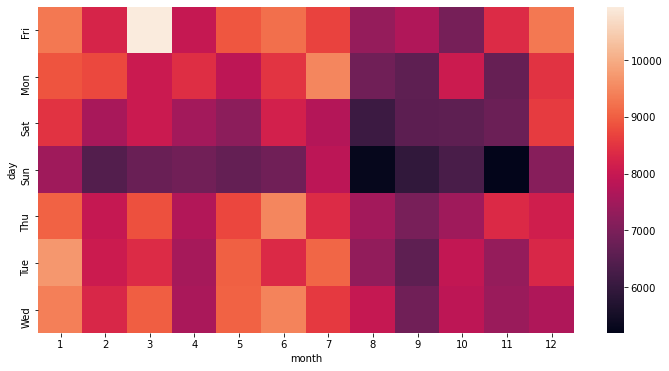

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(month_day)

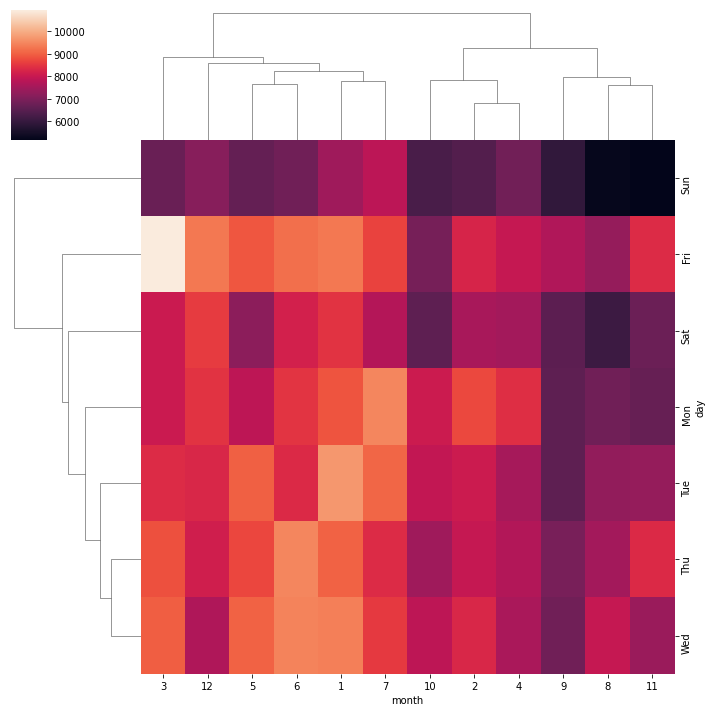

In [41]:
sns.clustermap(month_day)

-- Grouping with year and month --

In [51]:
year_month = df.groupby(by = ['year', 'month']).count()['reason'].unstack()
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7916.0
2016,13096.0,11396.0,11059.0,11287.0,11374.0,11732.0,12088.0,11904.0,11669.0,12502.0,12091.0,12162.0
2017,11605.0,10267.0,11684.0,11056.0,11719.0,12333.0,11768.0,11753.0,11332.0,12337.0,11548.0,12941.0
2018,13123.0,11165.0,14923.0,11240.0,12551.0,12106.0,12549.0,12315.0,12338.0,12976.0,14097.0,12144.0
2019,12304.0,11556.0,12441.0,11845.0,12823.0,12322.0,13166.0,12387.0,11874.0,13425.0,12446.0,12529.0


<AxesSubplot:xlabel='month', ylabel='year'>

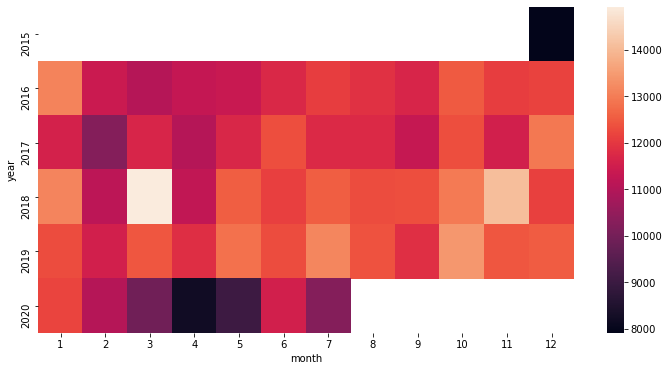

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(year_month)